In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('loan.csv')

# Display the first few rows of the dataset
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
# Display summary statistics
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [ ]:
print(df.tail())

      Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611     

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

loan_data = pd.read_csv('loan.csv')

# Fill missing values based on column type or drop if too many
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)
loan_data['Self_Employed'].fillna('No', inplace=True)
loan_data['Credit_History'].fillna(1, inplace=True)
loan_data.dropna(subset=['Gender', 'Married', 'Dependents', 'Education', 'Property_Area'], inplace=True)

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
loan_data[categorical_cols] = loan_data[categorical_cols].astype('category')

# Remove Duplicates
loan_data.drop_duplicates(inplace=True)

# Handle Outliers
# For numeric columns, check for outliers using the IQR method
#for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
   # Q1 = loan_data[col].quantile(0.25)
    #Q3 = loan_data[col].quantile(0.75)
    #IQR = Q3 - Q1
    #lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR
    #loan_data[col] = loan_data[col].clip(lower=lower_bound, upper=upper_bound)  # Clip outliers to the bounds


In [ ]:
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


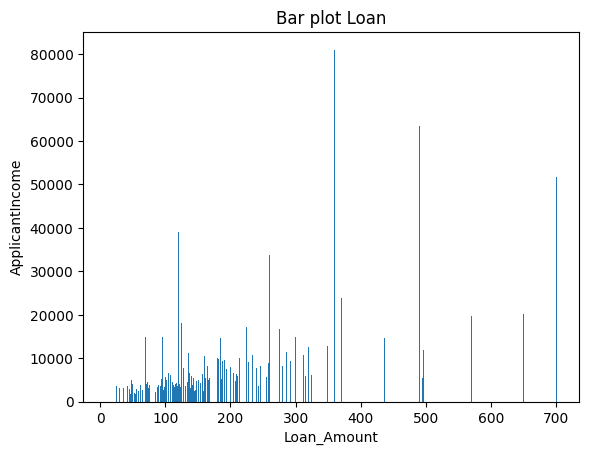

In [ ]:
#Univariate analysis
#Bar plot

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('loan.csv')

plt.bar(df['LoanAmount'],df['ApplicantIncome'])
plt.xlabel('Loan_Amount')
plt.ylabel('ApplicantIncome')
plt.title('Bar plot Loan')
plt.show()

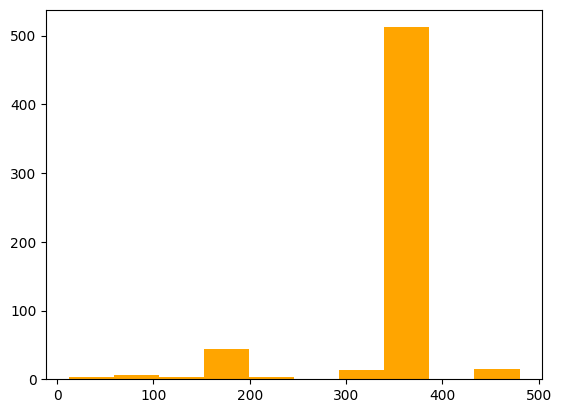

In [ ]:
#Histogram
plt.hist(df.Loan_Amount_Term,color='orange')
plt.show()

<Axes: ylabel='Density'>

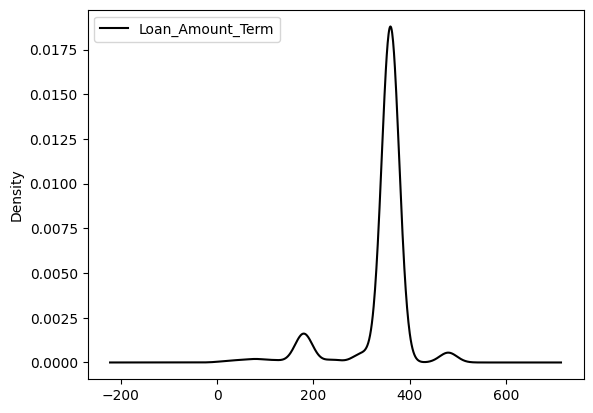

In [ ]:
#Density plot
df.plot(x='LoanAmount',y='Loan_Amount_Term',kind='density',color='black')

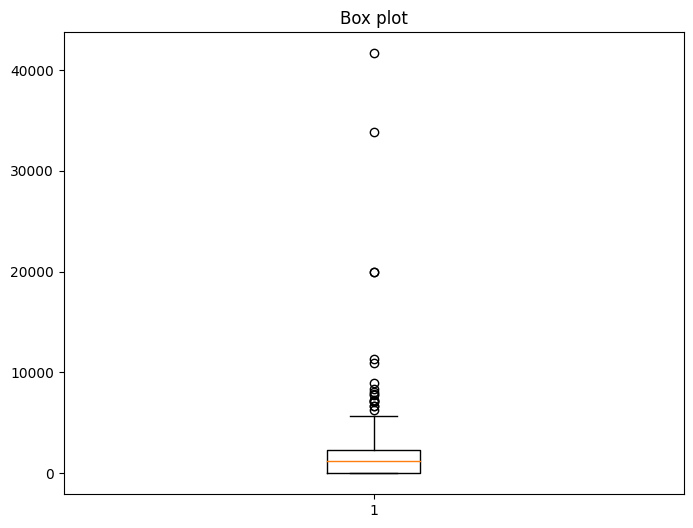

In [ ]:
#Box plot
plt.figure(figsize=(8,6))
plt.boxplot(df.CoapplicantIncome)

plt.title('Box plot')
plt.show()

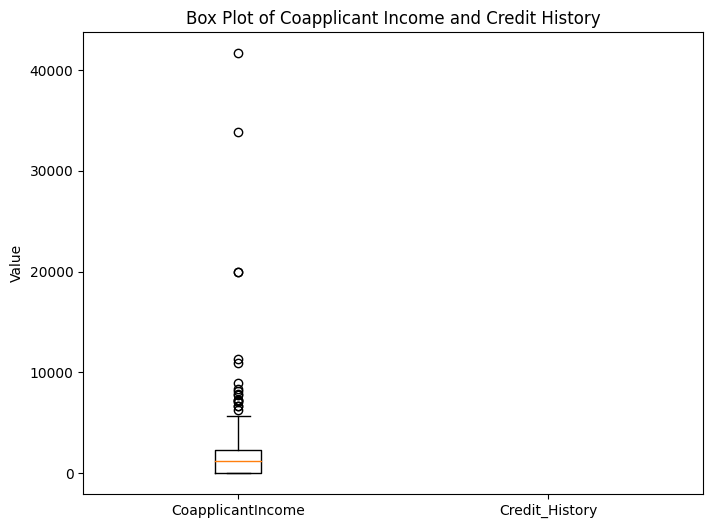

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('loan.csv')

# Specify the columns to plot
columns_toplot = ['CoapplicantIncome', 'Credit_History']

# Select the data from the DataFrame
selected_data = df[columns_toplot]

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot([selected_data['CoapplicantIncome'], selected_data['Credit_History']],
            labels=columns_toplot)  # Use actual data, and set labels

plt.title('Box Plot of Coapplicant Income and Credit History')
plt.ylabel('Value')
plt.show()


<Axes: title={'center': 'Swarm Plot of Coapplicant Income'}, xlabel='CoapplicantIncome'>

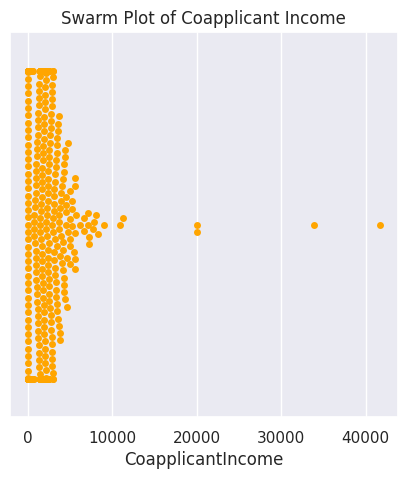

In [ ]:
#Swarm plot
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Swarm Plot of Coapplicant Income')
sns.swarmplot(x=df['CoapplicantIncome'],color='orange')

<Axes: xlabel='Married', ylabel='LoanAmount'>

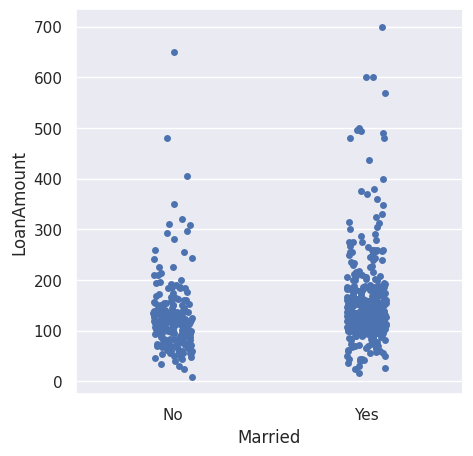

In [ ]:
#Strip plot
sns.stripplot(x=df['Married'],y=df['LoanAmount'])

<Axes: ylabel='Education'>

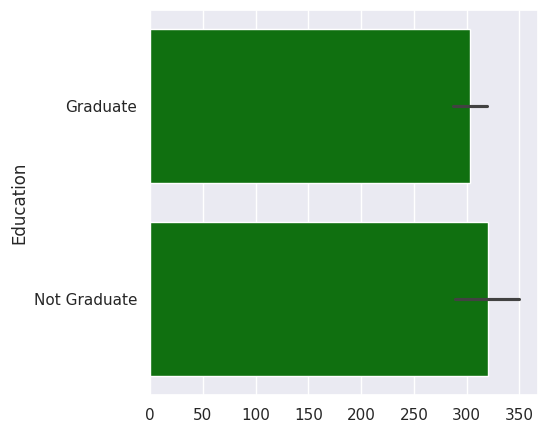

In [ ]:
#Barplot
sns.barplot(df['Education'],color = 'green')

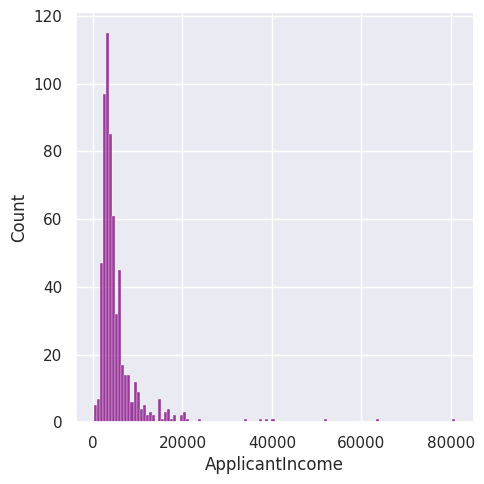

In [ ]:
#Distplot
sns.displot(df['ApplicantIncome'],color = 'purple')

<Axes: xlabel='Loan_Amount_Term'>

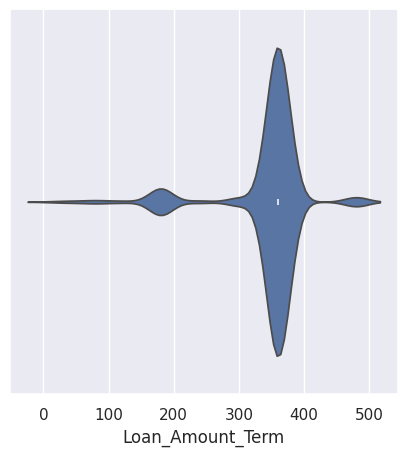

In [ ]:
#Violin plot
sns.violinplot(x=df['Loan_Amount_Term'])

<Axes: xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

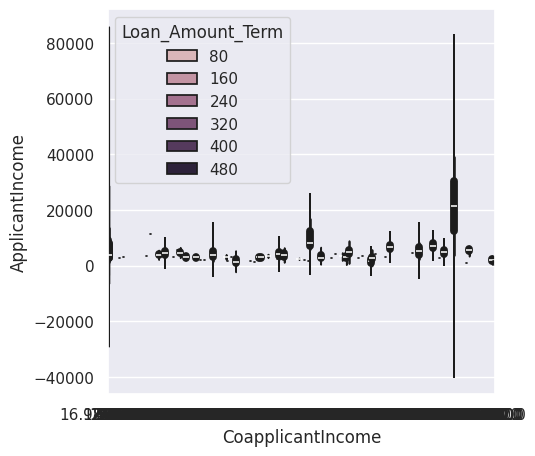

In [ ]:
sns.violinplot(data=df, x="CoapplicantIncome", y="ApplicantIncome", hue="Loan_Amount_Term")

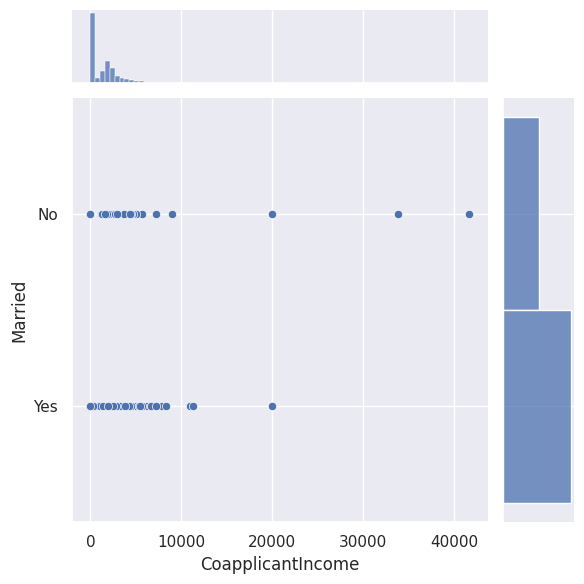

In [ ]:
#Joint Plot
sns.jointplot(data=df, x="CoapplicantIncome", y="Married")

<Axes: xlabel='CoapplicantIncome', ylabel='Education'>

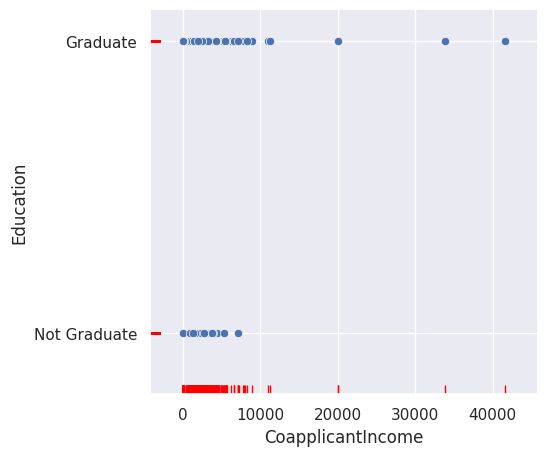

In [ ]:
#Scatter and Rug Plot
sns.scatterplot(data=df, x="CoapplicantIncome", y="Education")
sns.rugplot(data=df, x="CoapplicantIncome", y="Education",color='red')

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

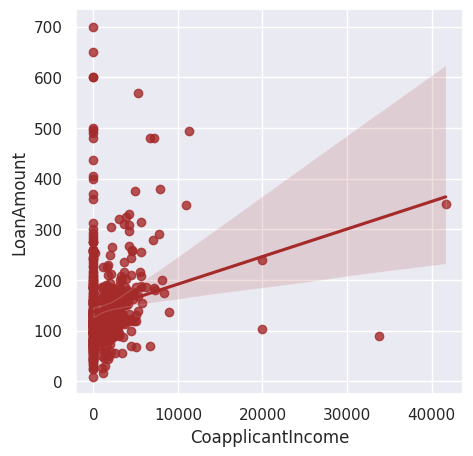

In [ ]:
#Reg Plot
sns.regplot(data=df, x="CoapplicantIncome", y="LoanAmount",color='brown')

<Axes: xlabel='Task', ylabel='Model'>

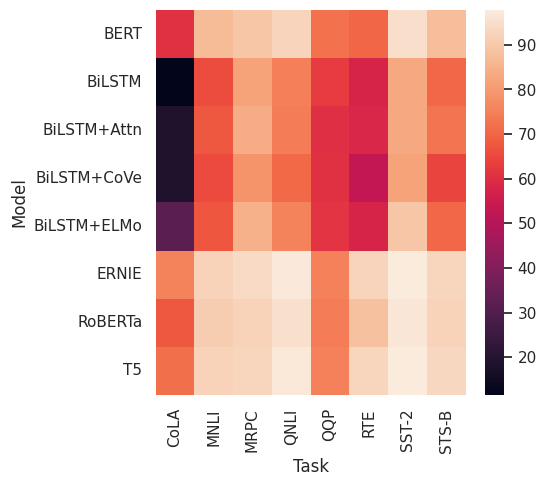

In [ ]:
#Heatmap
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)